In [1]:
import sys, os
sys.path.append(os.pardir)

from dataset.gaa import *
from dataset.mnist import load_mnist


#(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
(x_train, t_train), (x_test, t_test) = GAADataLoader().load_gaa_data()

####続きのimg_showで表示させるためには、以下の形式である必要あり。
#(60000, 784)
#要するにx,yの２次元配列ではなく、それを1次元配列に直す必要がある。

print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

2023-01-06 14:32:50.287016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 14:32:50.378135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-06 14:32:50.378163: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-06 14:32:50.403293: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-06 14:32:50.934894: W tensorflow/stream_executor/platform/de

(633633, 3, 64, 64)
(633633,)
(159159, 3, 64, 64)
(159159,)


In [2]:
x_train_backup = x_train
x_train = x_train.reshape(633633, -1)
print(x_train.shape)
print(x_train[0].shape)


(633633, 12288)
(12288,)


159


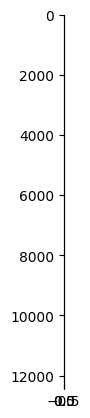

In [3]:
#画像の読み込み

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt #jupyter上で表示するにはこれが必要
#https://qiita.com/Tatejimaru137/items/44646c9bb3799768fa81

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img)
    #pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)

#print(img.shape)
#img = img.reshape(28, 28)
#print(img.shape)

img_show(img)

#けども、この方法だと以下のように上手くいかない！

In [4]:
#チャネルが３つ存在した場合、どれか１つのチャネルを選択していくしかなさそう。
x_train = x_train_backup
print(x_train.shape)

(633633, 3, 64, 64)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(64, 64)
159
(64, 64)


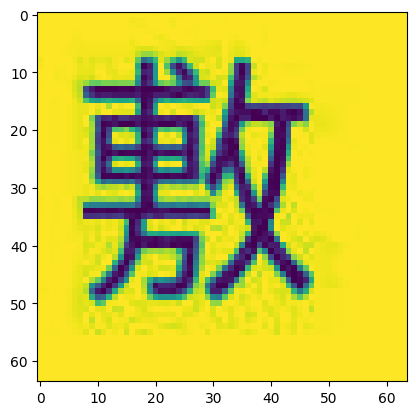

In [5]:
img = x_train[0][0]
print(img)
print(img.shape)

label = t_train[0]
print(label)
print(img.shape)

img_show(img)

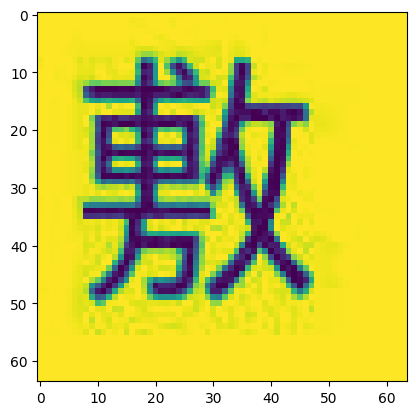

In [6]:
img = x_train[0][1]
img_show(img)

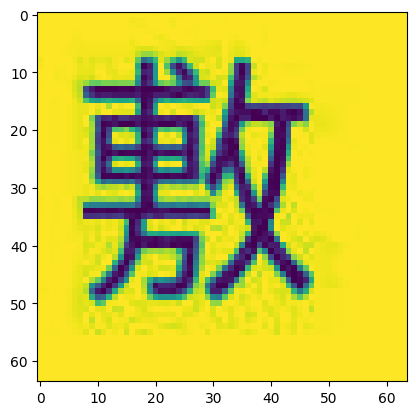

In [7]:
img = x_train[0][2]
img_show(img)

In [8]:
#labelごとにimageをまとめて、10ラベルを選択して、表示を行ってみる。
db = {}
for i in range(len(x_train)):
    label = t_train[i]
    if not(label in db):
        db[label] = []
        
    db[label].append(x_train[i])
        

In [9]:
print(len(x_train))
print(len(db[1]))

def show(images):
    plt.figure(figsize = (10, 5))
    for i, image in enumerate(images):
        image = image.transpose(1,2,0)
        if i <= 10:
            plt.subplot(10, 3, i+1)
            show_img = array_to_img(image, scale = False)
            plt.xticks(color = "None")
            plt.yticks(color = "None")
            plt.tick_params(bottom = False, left = False)
            plt.imshow(show_img)


633633
633


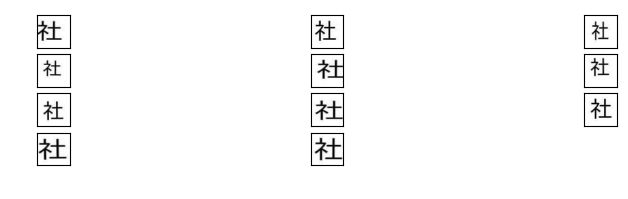

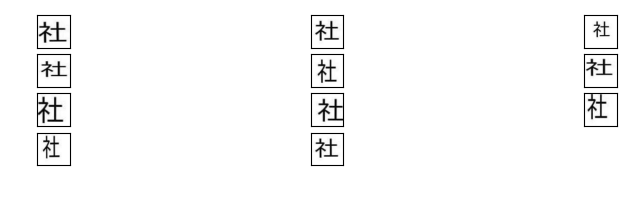

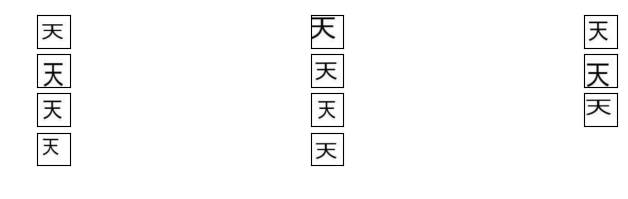

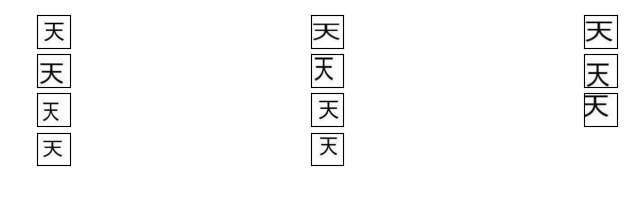

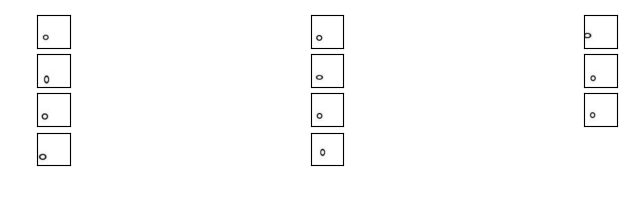

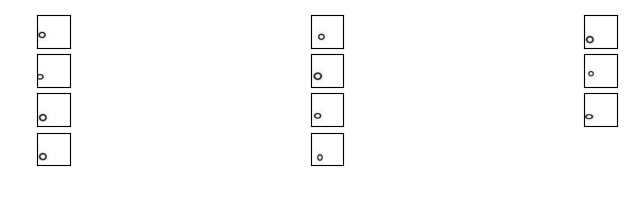

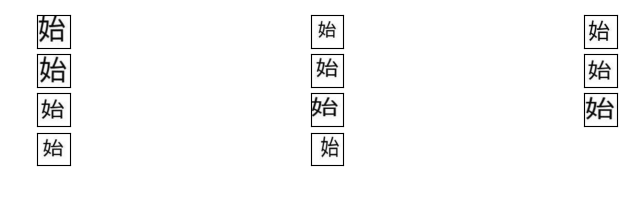

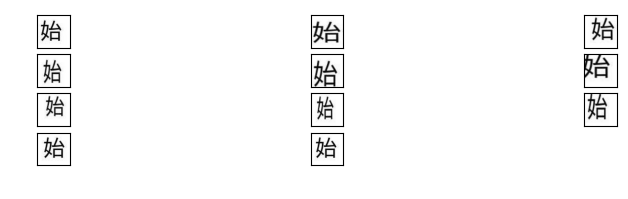

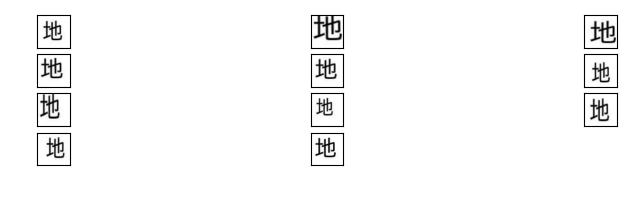

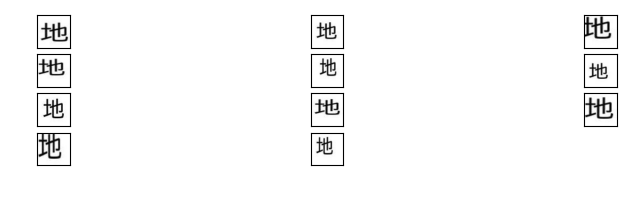

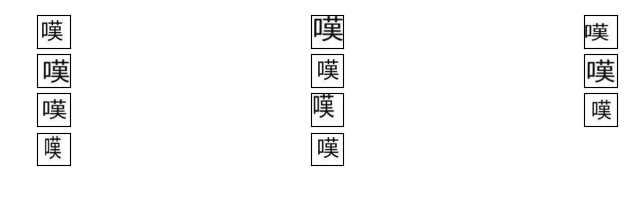

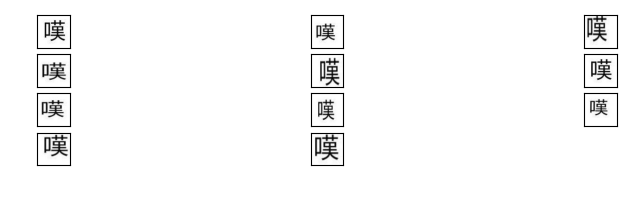

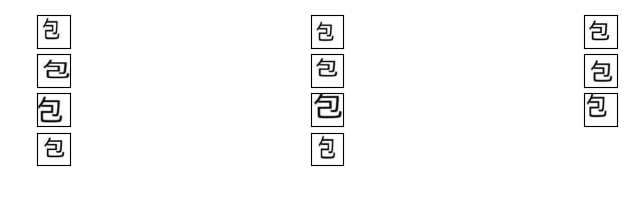

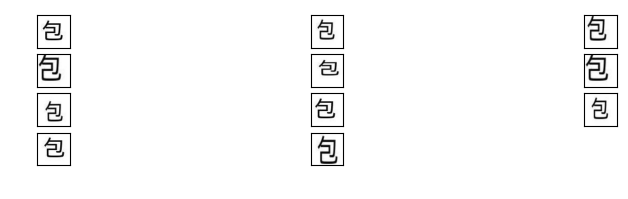

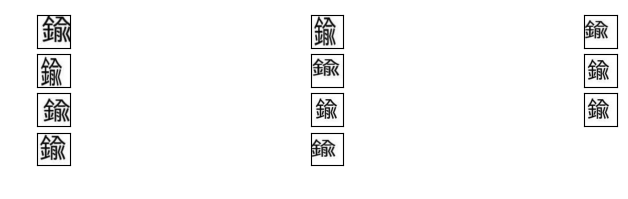

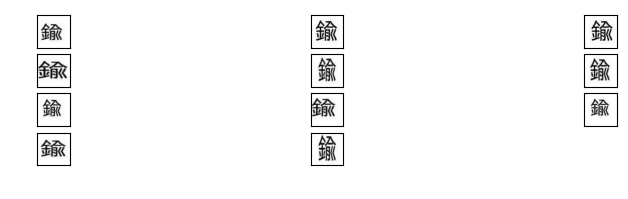

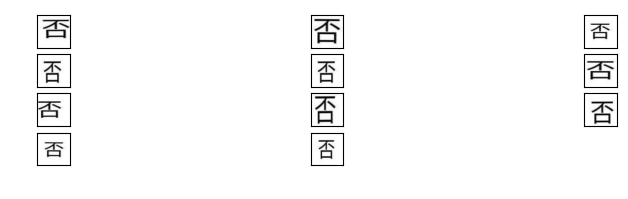

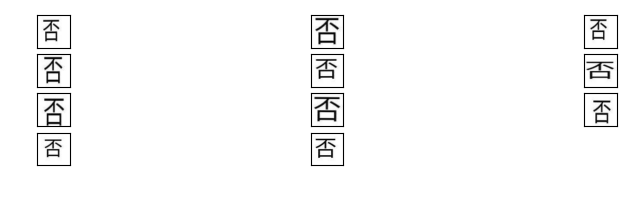

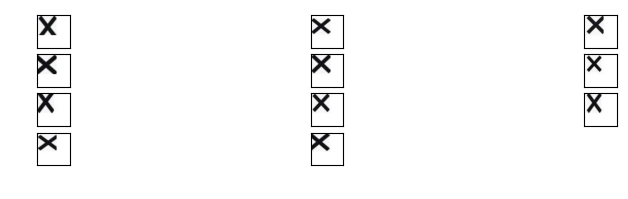

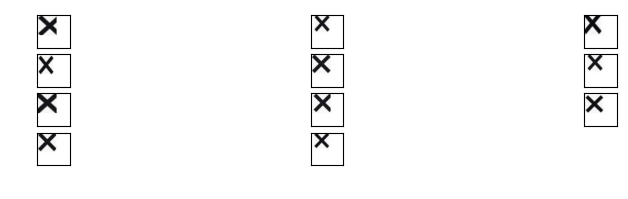

In [10]:
select = [0, 10, 20, 100, 200, 300, 500, 700, 900, 1000]

for i in select:
    show(db[i])
    show(list(reversed(db[i])))

In [11]:
db = {}
for i in range(len(x_test)):
    label = t_test[i]
    if not(label in db):
        db[label] = []
        
    db[label].append(x_test[i])


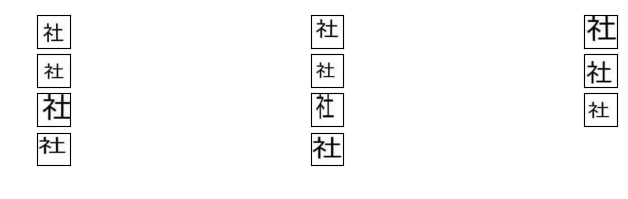

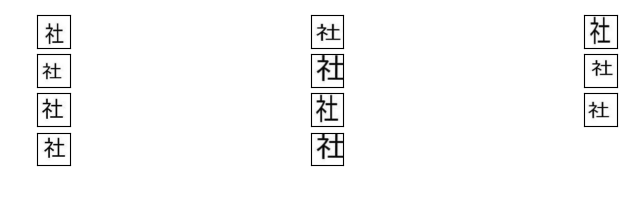

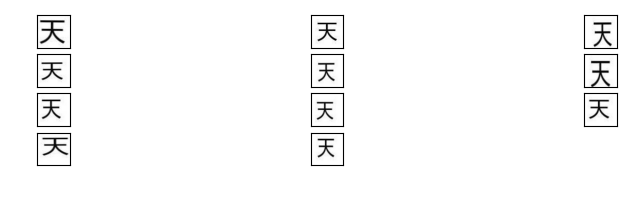

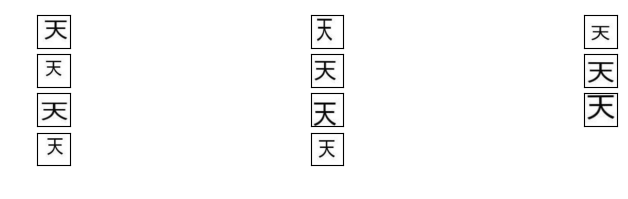

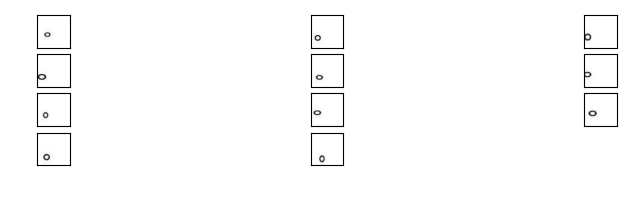

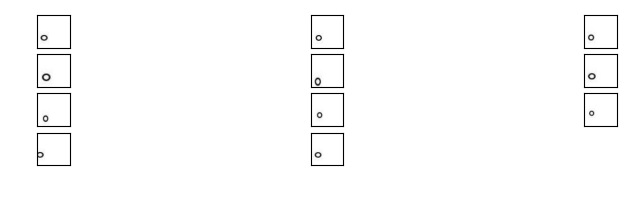

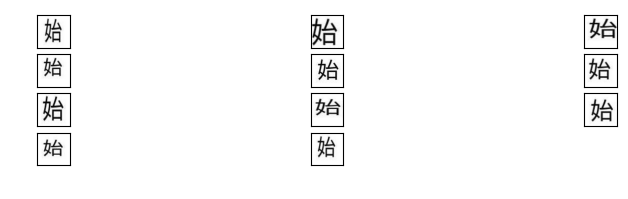

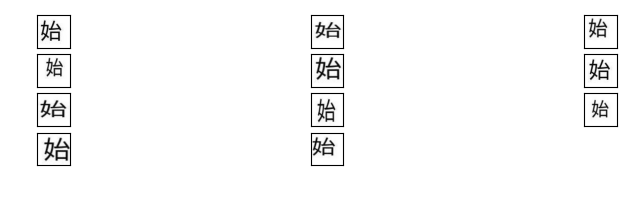

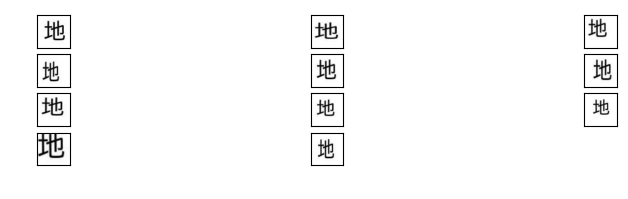

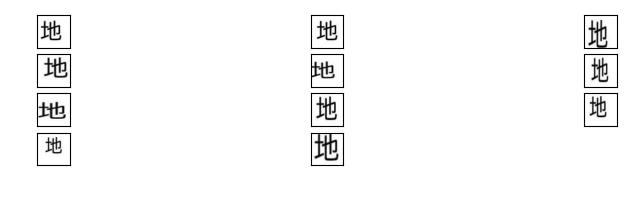

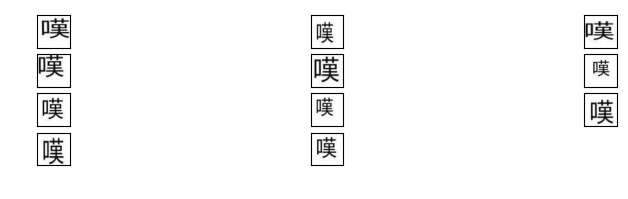

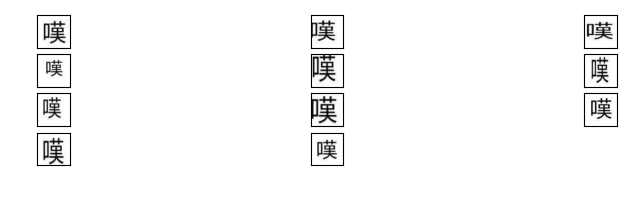

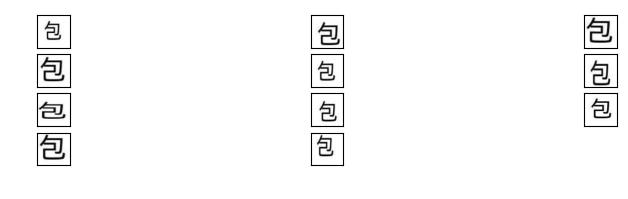

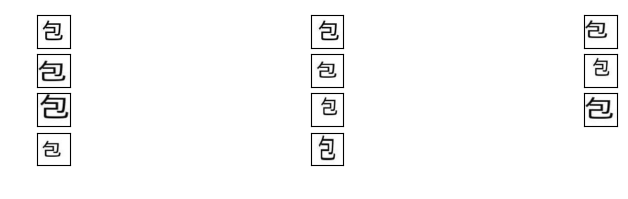

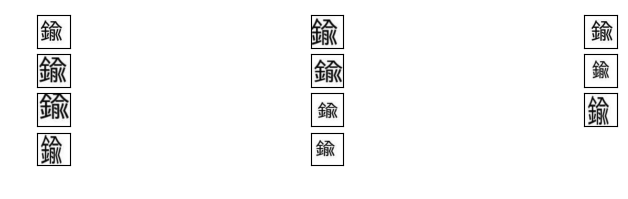

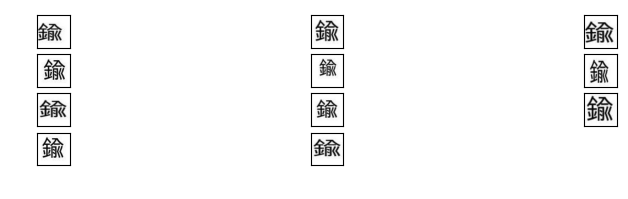

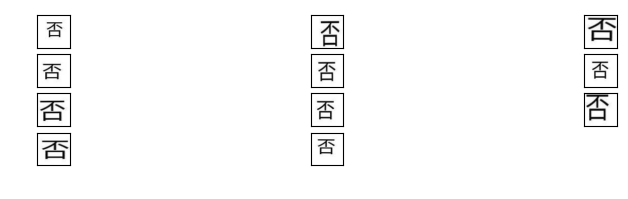

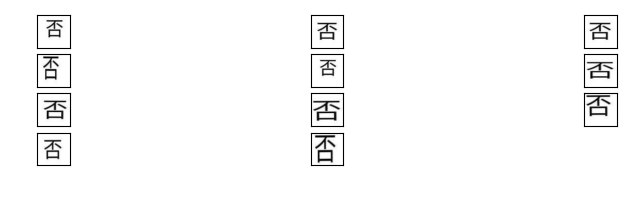

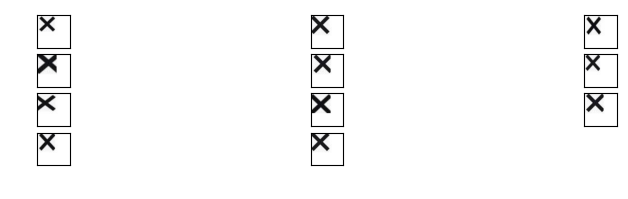

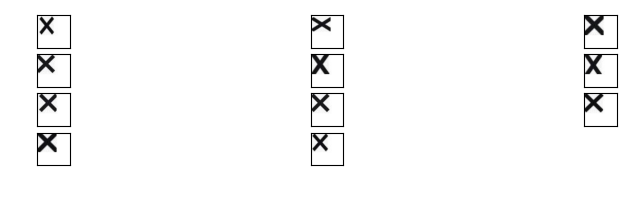

In [12]:
select = [0, 10, 20, 100, 200, 300, 500, 700, 900, 1000]

for i in select:
    show(db[i])
    show(list(reversed(db[i])))